In [ ]:
# binning a set of numbers

In [ ]:

print(type_sig)
print(str(type_sig))


ok input datatype
[-0.0, 0.6931471805599453, 1.0986122886681096, 1.3862943611198906, 1.3321790402101223, 1.5607104090414063, 1.945910149055313, 1.9061547465398496, 2.0431918705451206, 2.3025850929940455, 1.9722469794234416, 2.484906649788001, 2.458311329683084, 2.4410152780267023, 2.5232109529528914, 2.512658529529802, 2.3439329813080194, 2.293118601486813, 2.5066618124970015, 2.5968338688975634, 2.780466368938682, 2.7914209200851947, 2.7511022893863717, 2.578629173891135, 2.8443053266982625, 2.864738512190568, 2.8657034203478964, 2.8492350266891995, 2.8053739589572357, 2.759471613253441, 2.9530375303326304, 2.9564942071794795, 2.8428610432913706, 2.3261809641253577, 2.9559804761473534, 2.7918020799733867, 2.4308120114733662, 2.3556163786533877, 2.983483622246269, 2.6711824653412304, 3.1215305459000042, 3.0276962897725097, 3.0677377948224924, 2.665141910633296, 2.950092145174584, 2.4962560391710076, 2.7287372232140465, 3.0065821713407734, 2.788582053421921, 3.170220011895221, 2.1591147

16

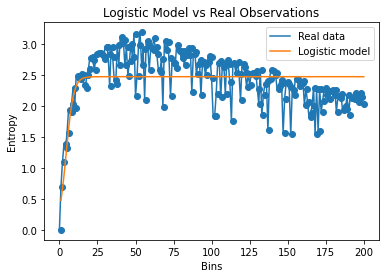

In [3]:
#from scipy.stats import entropy
import numpy as np

inp = np.random.random(200)*100
#inp = np.random.randint(100, size=(1000))

a , b , c , d = entropy_heuristic_binning(inp)
a


In [1]:

def entropy_heuristic_binning(signal):

    import numpy as np
    from kneed import DataGenerator, KneeLocator
    import math
    import numpy as np
    import pandas as pd
    import scipy.optimize as optim
    import matplotlib.pyplot as plt


    def entrp(probs):
        # quantifies the average amount of surprise
        p = np.full(probs.shape, 0.0)
        np.log(probs, out=p, where=(probs > 0))
        return -((p * probs).sum())
    
    type_sig = type(signal)

    if str(type_sig) == "<class 'numpy.ndarray'>":
        print('ok input datatype')
    if str(type_sig) != "<class 'numpy.ndarray'>":
        print('input cast to numpy.ndarray')
        signal = np.array(signal)


    collate = []
    x = []
    u, c = np.unique(signal, return_counts=True)
    u_   = len(u)

    for l in range(u_):
        hist = np.histogram(signal, bins=l+1, density=True)
        data = hist[0]
        unique, counts = np.unique(data, return_counts=True)
        prob = counts/counts.sum()
        ent = entrp(prob)
        collate.append(ent)
        x.append(l+1)

    print(collate)

    plt.plot(collate)


    # Define funcion with the coefficients to estimate
    def my_logistic(t, a, b, c):
        return 0.0001 + c / (1 + a * np.exp(-b*t))

    # Randomly initialize the coefficients
    p0 = np.random.exponential(size=3)
    p0

    # Set min bound 0 on all coefficients, and set different max bounds for each coefficient
    bounds = (0, [100000., 3., 1000000000.])

    (a,b,c),cov = optim.curve_fit(my_logistic, x, collate, bounds=bounds, p0=p0)

    # Show the coefficients
    a,b,c

    x = np.array(x)
    x

    # Redefine the function with the new a, b and c
    def my_logistic(t):
        return 0.0001 + c / (1 + a * np.exp(-b*t))

    plt.scatter(x, collate)
    plt.plot(x, my_logistic(x))
    plt.title('Logistic Model vs Real Observations')
    plt.legend([ 'Real data', 'Logistic model'])
    plt.xlabel('Bins')
    plt.ylabel('Entropy')


    kneedle = KneeLocator(x, my_logistic(x), S=1.0, curve="concave", direction="increasing")

    print(round(kneedle.knee, 3))
    
    return round(kneedle.knee, 3),x,collate,my_logistic(x)



In [ ]:
!pip install lmfit

In [ ]:
my_logistic(x)


In [ ]:
res = entrp(prob)
res

In [ ]:
collate = []

for l in range(100):
    hist = np.histogram(signal, bins=l+1, density=True)
    data = hist[0]
    #ent = -(data*np.log(np.abs(data))).sum()
    ent = entropy(data)
    collate.append(ent)

print(collate)

In [ ]:
import math
collate = [0 if math.isnan(x) else x for x in collate]


In [ ]:
import matplotlib.pyplot as plt
plt.plot(collate)
